# Importing Modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

# Importing and Transforming Training and Test data set

In [8]:
df = pd.read_csv("training_data_modified.csv")
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df_target = pd.read_csv("training_data_targets.csv")
#df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
df.to_csv('training_data_modified.csv')
# df_target
#df['log_SQUARE_FT'] = np.log1p(df['SQUARE_FT'])
#df = df.drop(columns = 'SQUARE_FT')
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,City,LONGITUDE,LATITUDE
0,1,0,3,1250.000000,0,1,Pune,18.543800,73.943800
1,1,1,1,485.790072,0,0,Lalitpur,24.690280,78.418890
2,0,0,2,725.058005,1,1,Mumbai,19.216097,72.821721
3,1,0,1,300.026089,0,0,Lalitpur,24.690280,78.418890
4,0,0,3,1453.846154,1,1,Indore,20.448627,85.897743
...,...,...,...,...,...,...,...,...,...
26500,0,0,3,2026.085855,1,1,Ghaziabad,28.919600,76.897200
26501,1,0,3,1180.000000,0,0,Kolkata,22.550000,88.383300
26502,1,1,2,1267.719258,0,1,Pune,18.097689,74.735239
26503,0,0,3,1302.378256,1,1,Durg,20.860239,81.285753


In [9]:
encoder = OneHotEncoder()
#encoder_bhk = OneHotEncoder()

#df_city = df['City']
#df_bhk = df['BHK_NO.']

df_encoded = encoder.fit_transform(df[['City','BHK_NO.']]).toarray()
#df_en_bhk = encoder_bhk.fit_transform(np.array(df_bhk).reshape(-1,1))

#df_ohe = df_encoded.toarray()
#df_ohe_bhk = df_en_bhk.toarray()
#df_ohe

#df_bhk
#df_en_bhk
#df_ohe_bhk

df_without_city = df.drop(columns = ['City','BHK_NO.'])

combined_data = pd.concat([df_without_city, pd.DataFrame(df_encoded)], axis=1)
combined_data.columns = combined_data.columns.astype(str)
X_train, X_valid, y_train, y_valid = train_test_split(combined_data, df_target, test_size=0.2, random_state=42)

#X_train = X_train.drop(columns="Unnamed: 0")
#X_valid = X_valid.drop(columns="Unnamed: 0")
X_train

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,2,...,257,258,259,260,261,262,263,264,265,266
12267,0,0,1265.111049,1,1,12.876691,77.599080,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9527,0,0,1040.009788,1,1,22.541110,88.337780,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26031,0,1,1000.000000,1,1,28.431862,77.351104,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3960,0,0,850.111857,1,1,22.648322,88.443152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3314,0,0,1210.025929,1,1,26.916670,75.866670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0,1,1085.169352,1,1,26.900926,75.775927,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0,0,1100.244499,1,1,22.063720,82.191853,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0,0,1000.000000,1,1,19.044252,73.070650,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,1,1,2485.000000,0,0,30.662283,76.822397,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test = pd.read_csv('test_data.csv')
df_test['City'] = df_test['ADDRESS'].str.split(',').str[-1]
df_test = df_test.drop(columns = 'ADDRESS')
#df_test

encoder_test = OneHotEncoder(handle_unknown="ignore", categories=encoder.categories_)
#encoder_test_bhk = OneHotEncoder(handle_unknown="ignore", categories=encoder_bhk.categories_)

#df_city_test = df_test['City']
#df_bhk_test = df_test['BHK_NO.']

df_encoded_test = encoder_test.fit_transform(df_test[['City','BHK_NO.']]).toarray()
#df_encoded_test = encoder_test.fit_transform(np.array(df_city_test).reshape(-1,1))
#df_encoded_test_bhk = encoder_test_bhk.fit_transform(np.array(df_bhk_test).reshape(-1,1))

#df_ohe_test = df_encoded_test.toarray()
#df_ohe_test_bhk = df_encoded_test_bhk.toarray()
#df_ohe_test

df_test_without_city = df_test.drop(columns = ['City','BHK_NO.'])
#df_test_without_city
combined_data_test = pd.concat([df_test_without_city, pd.DataFrame(df_encoded_test)], axis=1)
combined_data_test.columns = combined_data_test.columns.astype(str)
#df_test_without_city
combined_data_test

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,2,...,257,258,259,260,261,262,263,264,265,266
0,0,0,1057.896332,1,1,22.483471,88.417711,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1340.588282,1,1,28.456809,77.099182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,800.000000,1,1,28.636760,77.363150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1800.327332,1,1,24.583330,73.683330,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,903.024911,0,1,22.700000,88.450000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0,0,655.021834,1,1,19.009356,73.095809,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2942,1,1,463.002114,0,0,12.995893,77.761394,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2943,0,0,850.340136,1,1,22.835481,86.221099,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2944,0,0,1050.144395,1,1,12.919423,77.522774,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Linear Regression

In [9]:
%%time

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred_linear = linear_reg_model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred_linear)
mse = mean_squared_error(y_valid, y_pred_linear)
r2 = r2_score(y_valid, y_pred_linear)

print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Absolute Error (MAE): 139.82705719780452
Mean Squared Error: 413799.79715721885
R-squared Score: 0.09237838497527862
CPU times: user 1.43 s, sys: 141 ms, total: 1.57 s
Wall time: 249 ms


In [10]:
y_test_linear = linear_reg_model.predict(combined_data_test)
y_test_linear

array([[130.01219462],
       [259.36049226],
       [ 17.01903133],
       ...,
       [-57.13384839],
       [ 73.08881081],
       [ 73.20158116]])

# K Nearest Neighbour Regression

In [17]:
%%time

knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [30, 50, 100, 500, 100], # check this again        
    'weights': ['uniform', 'distance'],  # Some weight funciton
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],  
    'leaf_size': [30, 50, 100, 500],           # for tree algo
    'p': [2], # Euclidean dist
    'n_jobs': [-1]
}

grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_knn_regressor = grid_search.best_estimator_
best_knn_regressor.fit(X_train, y_train.values.ravel())

y_pred_knn = best_knn_regressor.predict(X_valid)

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

mae_scores = cross_val_score(best_knn_regressor, X_train, y_train.values.ravel(), cv=5, scoring=scoring['mae'],n_jobs=-1)
mse_scores = cross_val_score(best_knn_regressor, X_train, y_train.values.ravel(), cv=5, scoring=scoring['mse'],n_jobs=-1)
r2_scores = cross_val_score(best_knn_regressor, X_train, y_train.values.ravel(), cv=5, scoring=scoring['r2'],n_jobs=-1)

print(f'Mean Absolute Error (MAE) scores: {mae_scores}')
print(f'Mean Squared Error (MSE) scores: {mse_scores}')
print(f'R2 Score scores: {r2_scores}')

print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean R2 Score: {np.mean(r2_scores)}')

mae = mean_absolute_error(y_valid, y_pred_knn)
mse = mean_squared_error(y_valid, y_pred_knn)
r2 = r2_score(y_valid, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Best Hyperparameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_jobs': -1, 'n_neighbors': 100, 'p': 2, 'weights': 'distance'}
Mean Absolute Error (MAE) scores: [60.55896218 55.67120843 61.90420886 61.25894639 65.0272225 ]
Mean Squared Error (MSE) scores: [ 57754.13987971  29677.5289472   67041.95257957  56116.02564421
 161923.00704487]
R2 Score scores: [0.8246276  0.91522544 0.74329213 0.86395921 0.6691675 ]
Mean MAE: 60.88410967299094
Mean MSE: 74502.53081910967
Mean R2 Score: 0.8032543758549139
Mean Absolute Error (MAE): 63.247556453931224
Mean Squared Error (MSE): 71084.19432617958
R-squared (R2): 0.8440851066136568
CPU times: user 8.72 s, sys: 1.06 s, total: 9.78 s
Wall time: 6min 45s


In [18]:
y_test_knn = best_knn_regressor.predict(combined_data_test)
y_test_knn

array([50.26192322, 62.27816749, 36.        , ..., 37.06867178,
       49.0884333 , 70.25622758])

# RANSAC Regression

In [19]:
%%time

param_grid = {
    'min_samples': [0.5, 1.0],
    'stop_n_inliers': [10, 20, 30],
    'max_trials': [100, 200, 1000]
}

ransac_regressor = RANSACRegressor()

grid_search = GridSearchCV(ransac_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rsc_regressor = grid_search.best_estimator_
best_rsc_regressor.fit(X_train, y_train.values.ravel())

y_pred_rsc = best_rsc_regressor.predict(X_valid)

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

mae_scores = cross_val_score(best_rsc_regressor, X_train, y_train.values.ravel(),n_jobs=-1, cv=5, scoring=make_scorer(mean_absolute_error))
mse_scores = cross_val_score(best_rsc_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(best_rsc_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(r2_score))

print("Mean Absolute Error (MAE) Scores:", mae_scores)
print("Mean Squared Error (MSE) Scores:", mse_scores)
print("R-squared (R2) Scores:", r2_scores)

mae = mean_absolute_error(y_valid, y_pred_rsc)
mse = mean_squared_error(y_valid, y_pred_rsc)
r2 = r2_score(y_valid, y_pred_rsc)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Best Hyperparameters: {'max_trials': 1000, 'min_samples': 1.0, 'stop_n_inliers': 10}
Mean Absolute Error (MAE) Scores: [ 97.51653864 101.51982522  88.28657677  99.02289147 209.76724213]
Mean Squared Error (MSE) Scores: [3.31162857e+05 1.95179644e+18 6.31942853e+18 4.22573484e+05
 5.10289235e+05]
R-squared (R2) Scores: [-1.76954191e-02 -1.64690979e-02 -6.57848071e-03 -1.89078159e-02
 -1.41367765e+12]
Mean Absolute Error (MAE): 113.7577196749568
Mean Squared Error (MSE): 466273.5152878766
R-squared (R2): -0.022716598452188874
CPU times: user 5.87 s, sys: 2.7 s, total: 8.57 s
Wall time: 6.69 s


In [20]:
y_test_rsc = best_rsc_regressor.predict(combined_data_test)
y_test_rsc

array([41.80176513, 56.31247995, 34.88518438, ..., 31.24347306,
       43.6119376 , 43.61414182])

# Decision Tree Regression

In [12]:
%%time

param_grid = {
    'criterion':['squared_error','friedman_mse','poisson'],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.01, 0.2, 0.5, 1, 10, 50, 100, 200],
    'splitter': ['best','random']
    #'max_depth': [3, 5, 10, 20] # Made the model less accurate
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

dt_best = DecisionTreeRegressor(**best_params,random_state=42)

dt_best.fit(X_train, y_train)

y_pred_dt = dt_best.predict(X_valid)

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

mae_scores = cross_val_score(dt_best, X_train, y_train, cv=5, scoring=scoring['mae'],n_jobs=-1)
mse_scores = cross_val_score(dt_best, X_train, y_train, cv=5, scoring=scoring['mse'],n_jobs=-1)
r2_scores = cross_val_score(dt_best, X_train, y_train, cv=5, scoring=scoring['r2'],n_jobs=-1)

print(f'Mean Absolute Error (MAE) scores: {mae_scores}')
print(f'Mean Squared Error (MSE) scores: {mse_scores}')
print(f'R2 Score scores: {r2_scores}')

print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean R2 Score: {np.mean(r2_scores)}')

mae = mean_absolute_error(y_valid, y_pred_dt)
mse = mean_squared_error(y_valid, y_pred_dt)
r2 = r2_score(y_valid, y_pred_dt)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Best Hyperparameters: {'ccp_alpha': 100, 'criterion': 'friedman_mse', 'max_features': None, 'splitter': 'best'}
Mean Absolute Error (MAE) scores: [44.40465803 44.84924873 46.02301151 46.57785441 58.67001675]
Mean Squared Error (MSE) scores: [ 22466.33753869  20668.65263661  18032.77011726  21808.71471432
 207819.07339456]
R2 Score scores: [0.93178021 0.94095951 0.93095138 0.94712963 0.57539509]
Mean MAE: 48.10495788665743
Mean MSE: 58159.109680289344
Mean R2 Score: 0.8652431651236597
Mean Absolute Error (MAE): 46.7966887223989
Mean Squared Error (MSE): 21580.71374236901
R-squared (R2): 0.9526652202470915
CPU times: user 3.95 s, sys: 983 ms, total: 4.93 s
Wall time: 1min 32s


In [14]:
y_test_dt = dt_best.predict(combined_data_test)
y_test_dt

array([ 41.59252498, 102.9785022 ,  30.08053036, ...,  30.08053036,
        41.59252498,  66.67120574])

# Random Forest Regression

In [15]:
%%time

hyperparameter_grid = {
    'criterion':['squared_error','friedman_mse','poisson'],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 50], # tuning to prevent overfitting
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2],
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=hyperparameter_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())

best_hyperparameters = grid_search.best_params_

print("Best Hyperparameters:", best_hyperparameters)

best_rf_regressor = RandomForestRegressor(**best_hyperparameters,random_state=42)
best_rf_regressor.fit(X_train, y_train.values.ravel())

y_pred_rf = best_rf_regressor.predict(X_valid)

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

mae_scores = cross_val_score(best_rf_regressor, X_train, y_train.values.ravel(), cv=5, scoring=scoring['mae'],n_jobs=-1)
mse_scores = cross_val_score(best_rf_regressor, X_train, y_train.values.ravel(), cv=5, scoring=scoring['mse'],n_jobs=-1)
r2_scores = cross_val_score(best_rf_regressor, X_train, y_train.values.ravel(), cv=5, scoring=scoring['r2'],n_jobs=-1)

print(f'Mean Absolute Error (MAE) scores: {mae_scores}')
print(f'Mean Squared Error (MSE) scores: {mse_scores}')
print(f'R2 Score scores: {r2_scores}')

print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean R2 Score: {np.mean(r2_scores)}')

mae = mean_absolute_error(y_valid, y_pred_rf)
mse = mean_squared_error(y_valid, y_pred_rf)
r2 = r2_score(y_valid, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

/Users/yashparihar/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}
Mean Absolute Error (MAE) scores: [29.94369018 31.20823976 32.42867236 29.79440043 39.68879766]
Mean Squared Error (MSE) scores: [ 18643.47184807  18829.32990403  18422.27514056  14311.18582503
 198153.54211251]
R2 Score scores: [0.94338847 0.94621358 0.92945994 0.96530572 0.5951432 ]
Mean MAE: 32.61276007823441
Mean MSE: 53671.96096604194
Mean R2 Score: 0.875902180740445
Mean Absolute Error (MAE): 33.98272873588749
Mean Squared Error (MSE): 23748.091966979602
R-squared (R2): 0.9479113287804819
CPU times: user 1min 45s, sys: 7.91 s, total: 1min 53s
Wall time: 3h 3min 8s


In [16]:
y_test_rf = best_rf_regressor.predict(combined_data_test)
y_test_rf

array([ 48.78721875, 204.40780174,  32.8495492 , ...,  27.19553111,
        53.84213126,  51.0193526 ])

# XG Boost Regression

In [23]:
%%time

xgb = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [3, 5, 7, 10, 20, 50],
    'random_state': [42]

}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("\033[1mBest Parameters:\033[0m", best_params)

best_xgb_regressor = XGBRegressor(**best_params)
best_xgb_regressor.fit(X_train, y_train.values.ravel())

y_pred_xgb = best_xgb_regressor.predict(X_valid)

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

mae_scores = cross_val_score(best_xgb_regressor, X_train, y_train.values.ravel(),n_jobs=-1, cv=5, scoring=make_scorer(mean_absolute_error))
mse_scores = cross_val_score(best_xgb_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(best_xgb_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(r2_score))

print("Mean Absolute Error (MAE) Scores:", mae_scores)
print("Mean Squared Error (MSE) Scores:", mse_scores)
print("R-squared (R2) Scores:", r2_scores)

mae = mean_absolute_error(y_valid, y_pred_xgb)
mse = mean_squared_error(y_valid, y_pred_xgb)
r2 = r2_score(y_valid, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

/Users/yashparihar/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'random_state': 42}
Mean Absolute Error (MAE) Scores: [29.89085041 30.84390838 30.46895242 32.05577025 37.89999985]
Mean Squared Error (MSE) Scores: [ 21890.69932225  21482.54588175  19765.06804593  33248.5570192
 199231.4358008 ]
R-squared (R2) Scores: [0.93352815 0.9386346  0.92431831 0.91939629 0.5929409 ]
Mean Absolute Error (MAE): 32.64144142506663
Mean Squared Error (MSE): 24906.716138875097
R-squared (R2): 0.9453700217297611
CPU times: user 31 s, sys: 8.17 s, total: 39.2 s
Wall time: 21min 29s


In [31]:
y_test_xgb = best_xgb_regressor.predict(combined_data_test)
y_test_xgb

array([ 44.072407, 228.1565  ,  39.31885 , ...,  25.966991,  50.369335,
        54.274715], dtype=float32)

# Hist Gradient Boosting Regression

In [21]:
%%time

param_grid = {
    'learning_rate': [0.01, 0.1, 1], # steps to get convergence, higher leads to overfitting
    'max_iter': [100, 200, 500, 1000, 2000],
    'max_depth': [3, 5, 10, 20],
    'random_state': [42]
}

hgrad_regressor = HistGradientBoostingRegressor()

grid_search = GridSearchCV(hgrad_regressor, param_grid,n_jobs=-1, cv=5,scoring=scoring, refit='r2', return_train_score=True)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_hgrad_regressor = grid_search.best_estimator_
best_hgrad_regressor.fit(X_train, y_train.values.ravel())

y_pred_hgrad = best_hgrad_regressor.predict(X_valid)

scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

mae_scores = cross_val_score(best_hgrad_regressor, X_train, y_train.values.ravel(),n_jobs=-1, cv=5, scoring=make_scorer(mean_absolute_error))
mse_scores = cross_val_score(best_hgrad_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(best_hgrad_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(r2_score))

print("Mean Absolute Error (MAE) Scores:", mae_scores)
print("Mean Squared Error (MSE) Scores:", mse_scores)
print("R-squared (R2) Scores:", r2_scores)

mae = mean_absolute_error(y_valid, y_pred_hgrad)
mse = mean_squared_error(y_valid, y_pred_hgrad)
r2 = r2_score(y_valid, y_pred_hgrad)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100, 'random_state': 42}
Mean Absolute Error (MAE) Scores: [42.91439194 42.33855943 46.68060951 43.49885529 46.56497583]
Mean Squared Error (MSE) Scores: [ 39924.57226977  29186.21457021  54222.59598234  42971.66129887
 151512.15676583]
R-squared (R2) Scores: [0.87876769 0.91662889 0.79237825 0.89582479 0.6904384 ]
Mean Absolute Error (MAE): 46.97128249156717
Mean Squared Error (MSE): 55403.80113032713
R-squared (R2): 0.8784782210965887
CPU times: user 12.9 s, sys: 2.82 s, total: 15.8 s
Wall time: 3min 57s


In [22]:
y_test_hgrad = best_hgrad_regressor.predict(combined_data_test)
y_test_hgrad

array([ 57.74585576, 175.85055214,  31.89512982, ...,  32.28779975,
        57.03860551,  53.22574811])

# Ada Boost Regression

In [32]:
%%time

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

adb_regressor = AdaBoostRegressor() # adb

grid_search = GridSearchCV(adb_regressor, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) 
grid_search.fit(X_train, y_train.values.ravel())

print("Best Parameters: ", grid_search.best_params_)

best_adb_regressor = grid_search.best_estimator_

best_adb_regressor.fit(X_train, y_train.values.ravel())

y_pred_adb = best_adb_regressor.predict(X_valid)

mae_scores = cross_val_score(best_adb_regressor, X_train, y_train.values.ravel(),n_jobs=-1, cv=5, scoring=make_scorer(mean_absolute_error))
mse_scores = cross_val_score(best_adb_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(best_adb_regressor, X_train, y_train.values.ravel(), cv=5,n_jobs=-1, scoring=make_scorer(r2_score))

print("Mean Absolute Error (MAE) Scores:", mae_scores)
print("Mean Squared Error (MSE) Scores:", mse_scores)
print("R-squared (R2) Scores:", r2_scores)

print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean R2 Score: {np.mean(r2_scores)}')

mae_adb = mean_absolute_error(y_valid, y_pred_adb)
mse_adb = mean_squared_error(y_valid, y_pred_adb)
r2_adb = r2_score(y_valid, y_pred_adb)

print("MAE:", mae_adb)
print("MSE:", mse_adb)
print("R2 Score:", r2_adb)

Best Parameters:  {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50, 'random_state': 42}
Mean Absolute Error (MAE) Scores: [61.84423597 67.12114454 63.79389852 64.79639817 71.7681412 ]
Mean Squared Error (MSE) Scores: [ 27715.23222448  40586.79867996  26139.40607642  25057.9944003
 212648.88781063]
R-squared (R2) Scores: [0.91584176 0.88406285 0.89991056 0.93925248 0.56552707]
Mean MAE: 65.86476367858154
Mean MSE: 66429.66383835961
Mean R2 Score: 0.8409189459457256
MAE: 68.18704040166753
MSE: 48051.513751177445
R2 Score: 0.8946046063462517
CPU times: user 12.8 s, sys: 2.7 s, total: 15.5 s
Wall time: 23min 46s


In [33]:
y_test_adb = best_adb_regressor.predict(combined_data_test)
y_test_adb

array([76.53891872, 76.53891872, 76.53891872, ..., 76.53891872,
       76.53891872, 76.53891872])

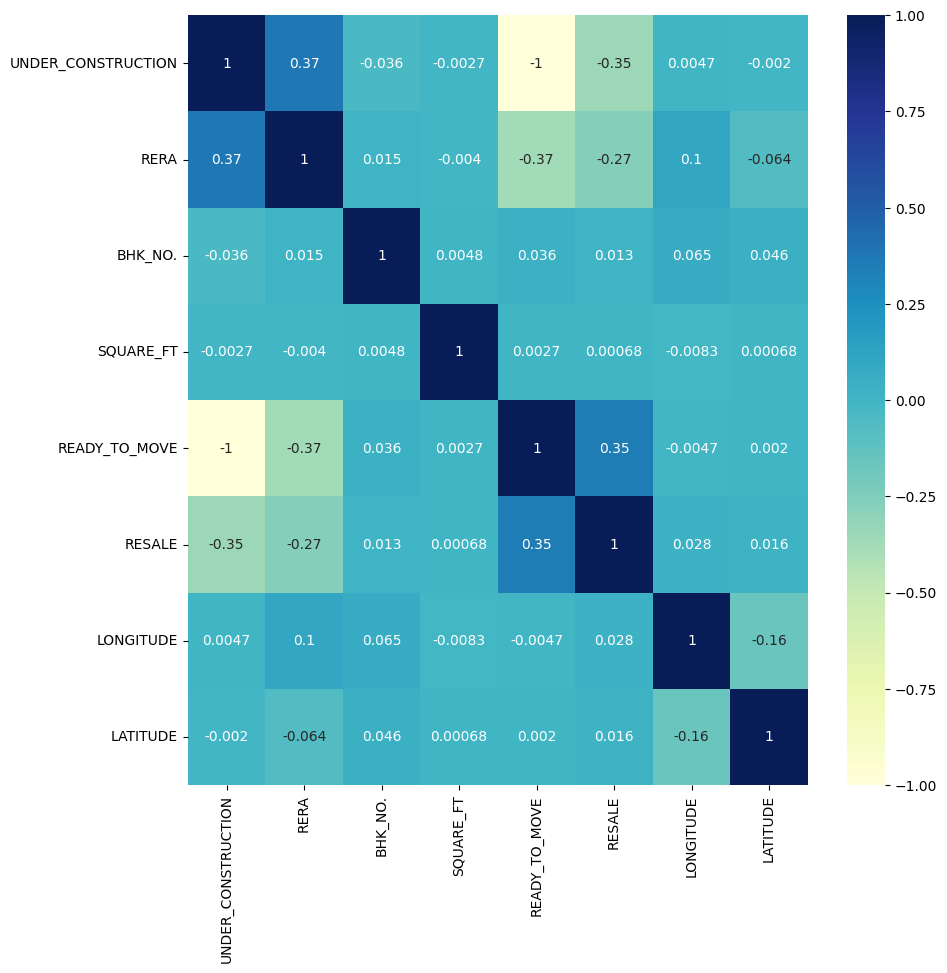

In [24]:
 plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(columns='City').corr(), cmap="YlGnBu", annot=True)
# sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
# # displaying heatmap 
plt.savefig('corr.png')
plt.show()